In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
# imports

#basic libraries
import numpy as np 
import pandas as pd
import sklearn
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from numpy import isnan
from sklearn.impute import KNNImputer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
import catboost
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectPercentile
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error

#stats, feature selection, dimensity, pipeline
from scipy import stats
from scipy.stats import norm, kurtosis
from scipy.stats import skew
from scipy.stats import pearsonr
from collections import Counter
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn import ensemble


#models and scores, scaling, stand, hyperparametres tun
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, \
                            precision_score, \
                            recall_score, \
                            f1_score, \
                            mean_squared_error, \
                            mean_absolute_error
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
#from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn.metrics import jaccard_score
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_curve, auc
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.feature_selection import mutual_info_regression

from numpy import absolute
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor

#ignore unneccesary warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
#warnings.filterwarnings("ignore"

# set seed for reproducibility
np.random.seed(0)
print("Added imports successfully.")

Added imports successfully.


This is my second project/competition. I'm totally new in data science world and I'm open to tips, suggestions. My code is messy, but I tried to describe my project steps. I tried many models - this is my way to learning new things, approaches(so my code is soooo slow ;) ). I used many sources, I tried attach links to help the others and appreciate the authors of a given method. Probably I made many mistakes, but I also determined to acquire knowledge (so be careful if you copying my code without checking it). Of course, I encourage you to work with my code :).
Short resume of my approach:
1. Data preproccesing and describe. Dealing with missing data (fill missing values by documentation when NA means something else than NA. KNN Imputer for real missing data. Dealing with skewness(numeric features with log method), kurtosis to visualize that outliers in plot there are not always useless outliers. 
2. Standard Scaler. (Maybe I should use Robust Scaler)
3. New features added.
4. Split and create new dataframe(with added new features).
5. Models
-Linear Regression
-HistGradientBoostingRegressor
-AdaBoostRegressor
-CatBoostRegressor
-SVR(linear) - commented
-XGBRegressor
-Random Forest Regressor
-Gradient Boosting Regressor
-Voting Regressor

6. Hyperparameters tuning (in some cases create function to find best params, in some cases try "manually" find the best score.

In [3]:
print("Read the train set.\n")
train_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
train_data.head(6)

Read the train set.



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000


In [4]:
print("Read the train set.\n")
test_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
test_data.head(6)

Read the train set.



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [5]:
#Save the 'Id' column
train_ID = train_data['Id']
test_ID = test_data['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train_data.drop("Id", axis = 1, inplace = True)
test_data.drop("Id", axis = 1, inplace = True)

In [6]:
print("Get full data.")
def concatenate_data(train_data, test_data):
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

full_data = concatenate_data(train_data, test_data)
full_data = pd.DataFrame(full_data)

#Copies
full_data_copy = full_data

Get full data.


In [7]:
print("Column names, data types\n")
train_data.info(), test_data.info()

print("Number of rows, number of columns\n")
train_data.shape, test_data.shape

Column names, data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-nu

((1460, 80), (1459, 79))

In [8]:
# Useful function to calculate skewness - numeric features

print("Skewness function")

def skewness_calc(df, variables):
    for i, var in enumerate (variables):
        print(var, df[var].skew())

Skewness function


In [9]:
# Useful function to calculate kurtosis - numeric features

print("Kurtosis function.")

def kurtosis_calc(df, variables):
    for i, var in enumerate (variables):
        print(var, df[var].kurtosis())

Kurtosis function.


Create functions to outliers, caluclate train and test accuracy, to plotting and check models.

In [10]:
headers = train_data.columns

In [11]:
testheaders = test_data.columns

In [12]:
train_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [13]:
test_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [14]:
#Analyze missing data
print("Analyze missing data - Train set")
#Column with missing data summarize
count_missing_train = train_data.isnull().sum()
percentage_missing_train = train_data.isnull().sum() * 100 / len(train_data)

print((count_missing_train), "\n Percentage result \n", (percentage_missing_train))

Analyze missing data - Train set
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64 
 Percentage result 
 MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 80, dtype: float64


In [15]:
print("Analyze missing data - Test set")

#Column with missing data summarize
count_missing_test = test_data.isnull().sum()
percentage_missing_test = test_data.isnull().sum() * 100 / len(test_data)

print((count_missing_test), "\n Percentage result \n", (percentage_missing_test))

Analyze missing data - Test set
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 79, dtype: int64 
 Percentage result 
 MSSubClass        0.000000
MSZoning          0.274160
LotFrontage      15.558602
LotArea           0.000000
Street            0.000000
                   ...    
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
SaleType          0.068540
SaleCondition     0.000000
Length: 79, dtype: float64


Observed many missing values in a lot of features. Analyze data, observed that lot of missing data is not missing data but values examples: NA in Alley means No alley access. MasVnrType - Masonry veneer type None means None masonry veneer type, BsmtQual - Evaluates the height of the basement, NA means No Basement, BsmtCond - Evaluates the general condition of the basement NA menas, no basement, BsmtExposure - Refers to walkout or garden level walls, No - no exposure, NA - no basement, BsmtFinType1 - rating of basement finished area , NA means no basement, BsmtFinType2 - rating of basement finished area (if multiple types) , NA means no basement, FireplaceQu - fireplace quality, NA means no fireplace,  PoolQC - pool quality NA means No pool, Fence - Fence quality NA means No fence, MiscFeature - Miscellaneous feature not covered in other categories NA means None, GarageType - garage location NA means no garage, GarageFinish - interior finish of the garage NA means no garage, GarageQual - garage quality NA - no garage, GarageCond - garage condition NA - no garage. 
Goal: change values to suitable names.

In [16]:
#Change multiple values to suitable names (from data documentation).
train_data.replace({'Alley': {np.nan: "No alley access"},'BsmtQual': {np.nan: "No basement"}, 
                  'BsmtCond': {np.nan: "No basement"}, 'BsmtExposure': {np.nan: "No basement"}, 
                  'BsmtFinType1': {np.nan: "No basement"},'BsmtFinType2': {np.nan: "No basement"},
                  'FireplaceQu': {np.nan: "No fireplace"}, 'GarageType': {np.nan: "No garage"},
                  'GarageFinish': {np.nan: "No garage"}, 'GarageQual': {np.nan: "No garage"},
                  'GarageCond': {np.nan: "No garage"}, 'PoolQC': {np.nan: "No pool"}, 
                  'Fence': {np.nan: "No fence"}, 'MiscFeature': {np.nan: "None MiscFeature"},
                  'GarageFinish': {np.nan: "No garage"}, 'MasVnrType': {None: "No masonry veneer type"}}, inplace =True )
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,No pool,No fence,None MiscFeature,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,...,0,No pool,No fence,None MiscFeature,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,...,0,No pool,No fence,None MiscFeature,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,Corner,...,0,No pool,No fence,None MiscFeature,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,FR2,...,0,No pool,No fence,None MiscFeature,0,12,2008,WD,Normal,250000


In [17]:
#Analyze missing data after change NaN values.
print("Analyze missing data - Train set")
train_data.columns[train_data.isnull().any()]

Analyze missing data - Train set


Index(['LotFrontage', 'MasVnrArea', 'Electrical', 'GarageYrBlt'], dtype='object')

In [18]:
#Change multiple values to suitable names (from data documentation).

test_data.replace({'Alley': {np.nan: "No alley access"},'BsmtQual': {np.nan: "No basement"}, 
                  'BsmtCond': {np.nan: "No basement"}, 'BsmtExposure': {np.nan: "No basement"}, 
                  'BsmtFinType1': {np.nan: "No basement"},'BsmtFinType2': {np.nan: "No basement"},
                  'FireplaceQu': {np.nan: "No fireplace"}, 'GarageType': {np.nan: "No garage"},
                  'GarageFinish': {np.nan: "No garage"}, 'GarageQual': {np.nan: "No garage"},
                  'GarageCond': {np.nan: "No garage"}, 'PoolQC': {np.nan: "No pool"}, 
                  'Fence': {np.nan: "No fence"}, 'MiscFeature': {np.nan: "None MiscFeature"},
                  'GarageFinish': {np.nan: "No garage"}, 'MasVnrType': {None: "No masonry veneer type"}},inplace =True )
test_data.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,120,0,No pool,MnPrv,None MiscFeature,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,No alley access,IR1,Lvl,AllPub,Corner,...,0,0,No pool,No fence,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,No alley access,IR1,Lvl,AllPub,Inside,...,0,0,No pool,MnPrv,None MiscFeature,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,No alley access,IR1,Lvl,AllPub,Inside,...,0,0,No pool,No fence,None MiscFeature,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,No alley access,IR1,HLS,AllPub,Inside,...,144,0,No pool,No fence,None MiscFeature,0,1,2010,WD,Normal


In [19]:
#Analyze missing data after change NaN values.
print("Analyze missing data - Test set")
test_data.columns[test_data.isnull().any()]

Analyze missing data - Test set


Index(['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'SaleType'],
      dtype='object')

In [20]:
#Assign missing features to useful variables.
missing_values_train = train_data[['LotFrontage', 'MasVnrArea', 'Electrical', 'GarageYrBlt']]
missing_values_test = test_data[['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'SaleType']]

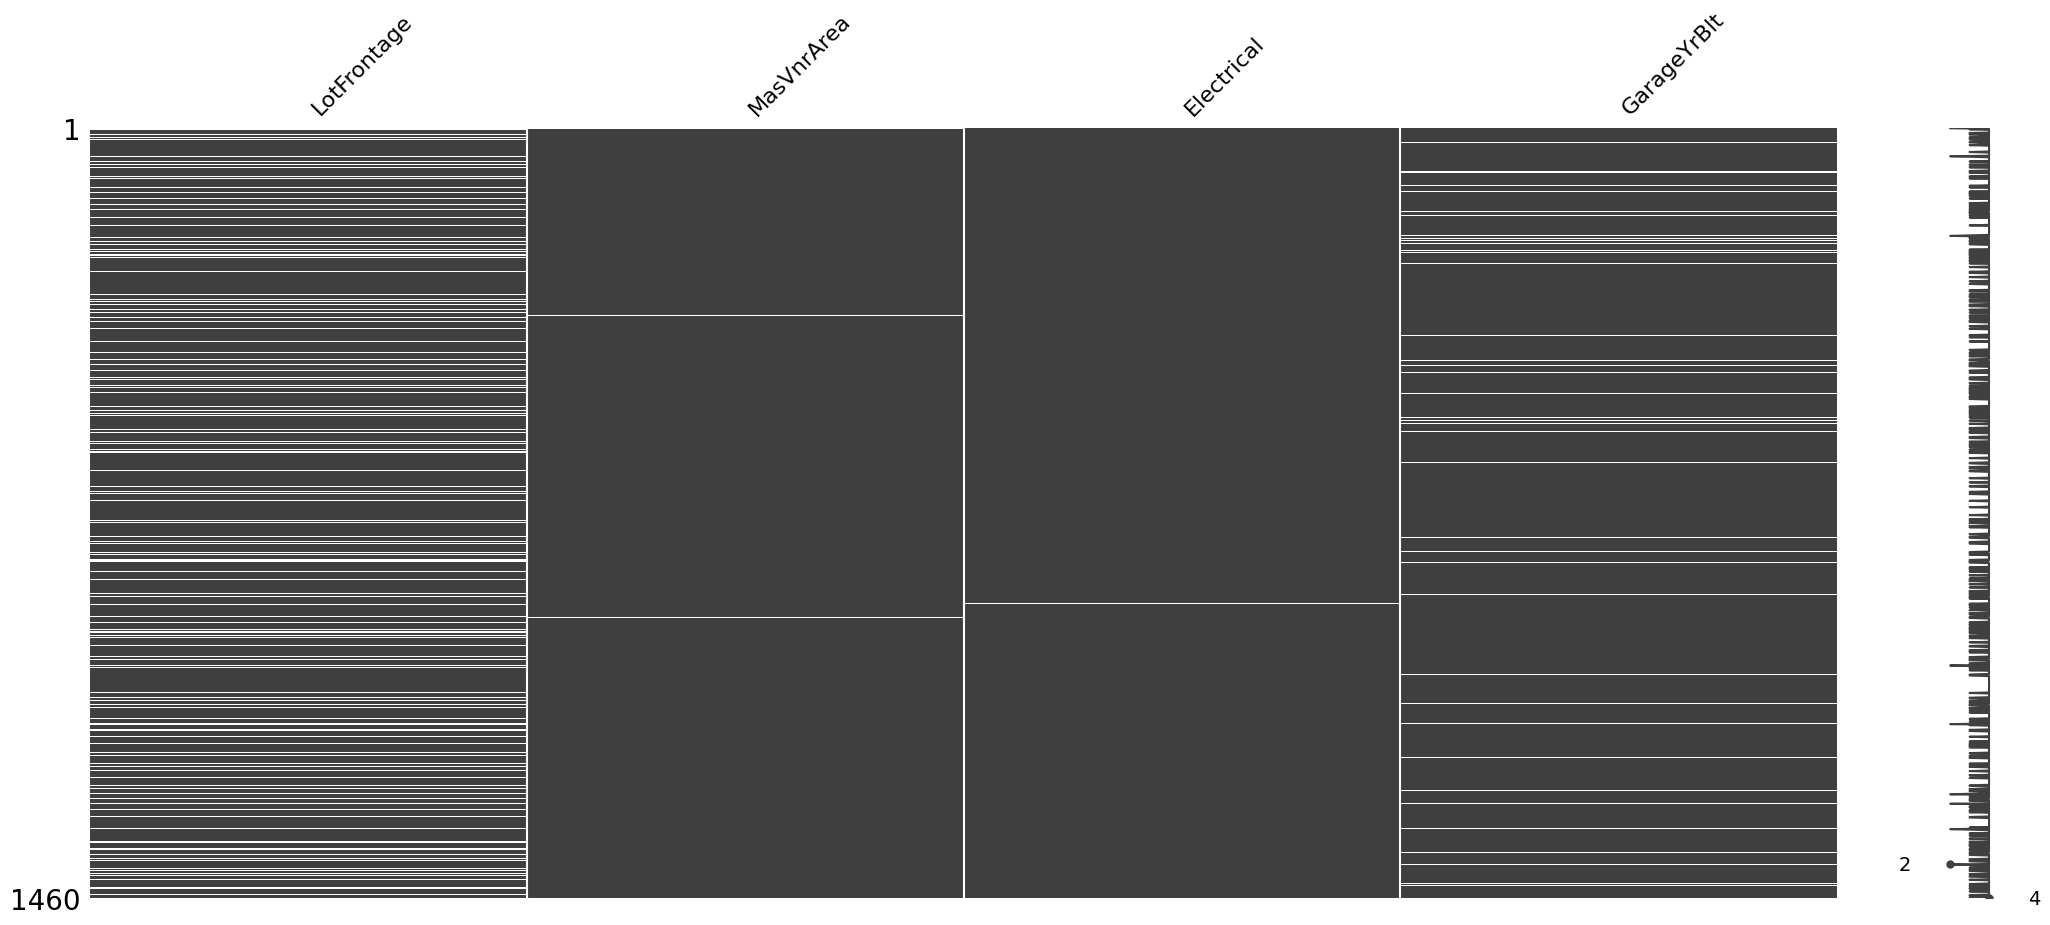

In [21]:
#Visualize character of missing data - Is it regular or random? Train set
ax1 = msno.matrix(missing_values_train.sample(1460))

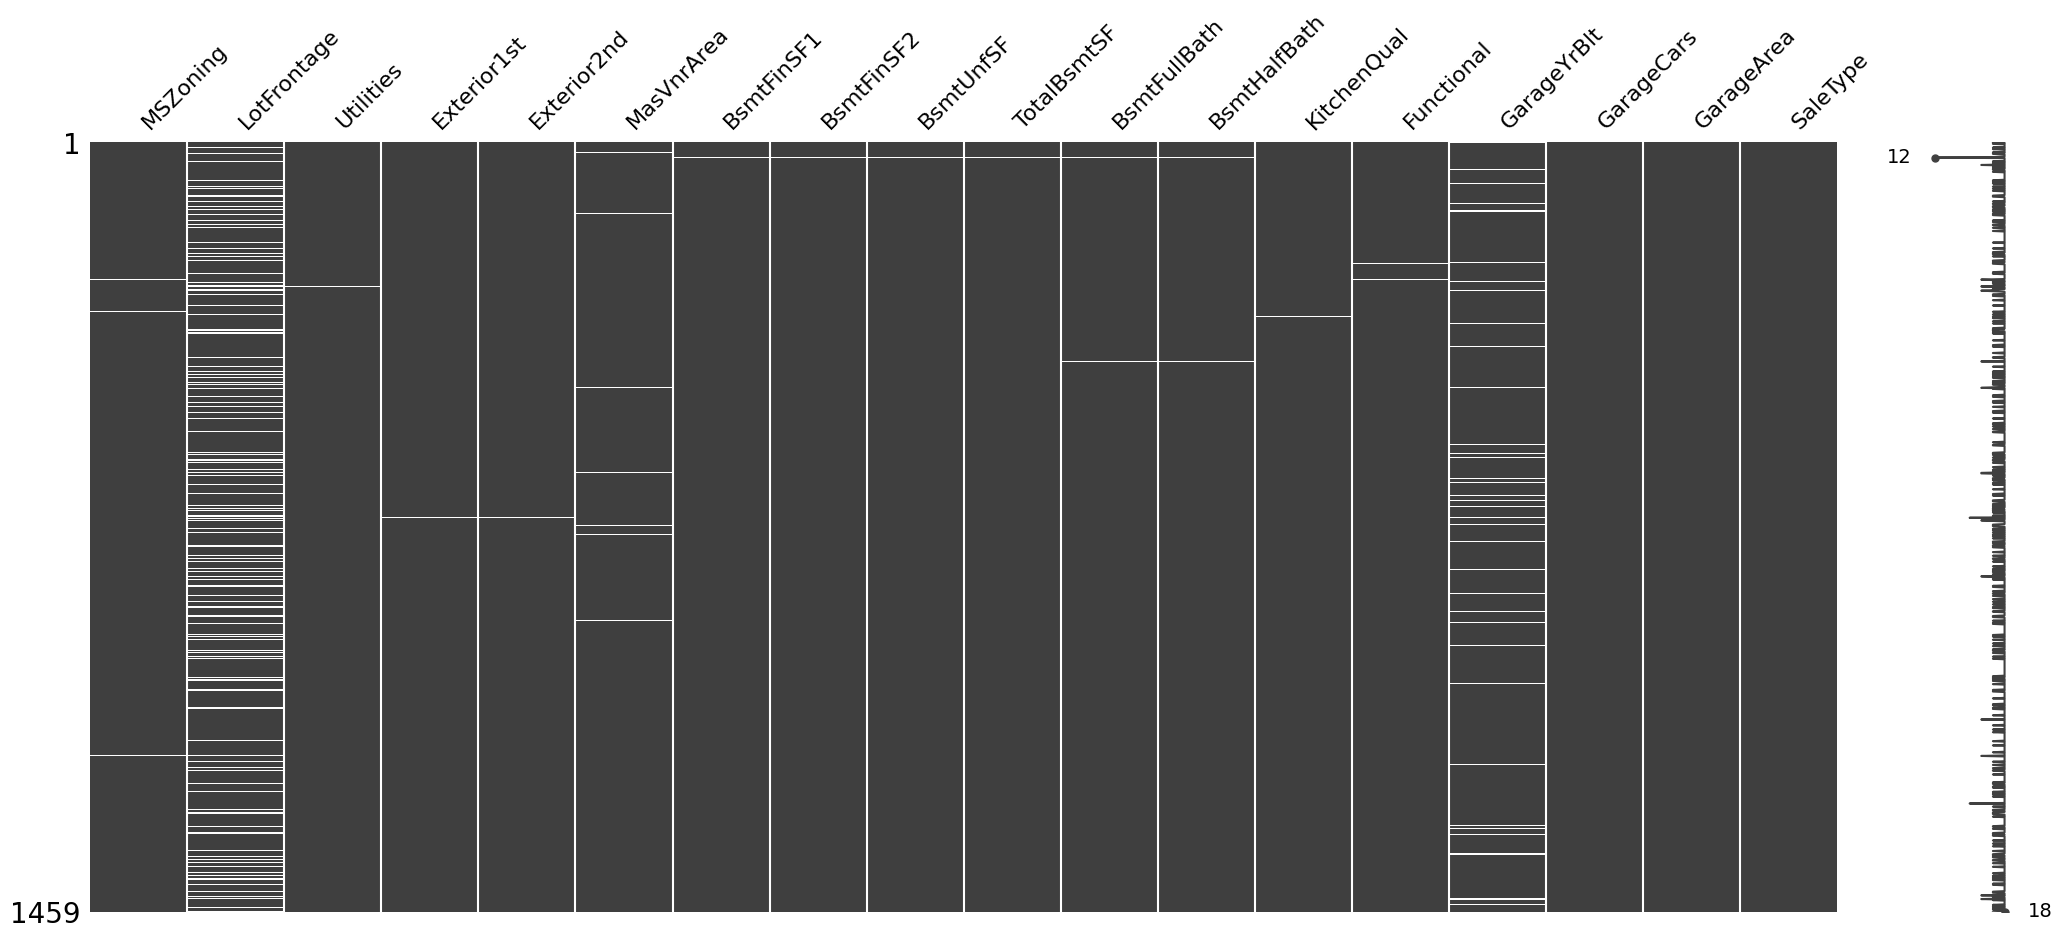

In [22]:
ax2 = msno.matrix(missing_values_test.sample(1459))

A few examples of regular missing data observed. Other cases(majority) of missing data have irregular character.

I choose imputation for filling missing values using k-Nearest Neighbors. I choose deafault values of neighbors - 5, weights - uniform (all points
will be calculated equally), metric auto - nan_euclidean.

In [23]:
train_data = train_data.apply(lambda series: pd.Series( LabelEncoder().fit_transform(series[series.notnull()]), index=series[series.notnull()].index ))
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
imputer.fit(train_data)

train_data = imputer.transform(train_data)

In [24]:
test_data = test_data.apply(lambda series: pd.Series(LabelEncoder().fit_transform(series[series.notnull()]), index=series[series.notnull()].index ))
imputer_test = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
imputer_test.fit(test_data)

test_data = imputer_test.transform(test_data)

In [25]:
print("Analyze missing data - Train set")
train_data = pd.DataFrame(train_data, columns = headers)
count_missing_train = train_data.isnull().sum()
percentage_missing_train = train_data.isnull().sum() * 100 / len(train_data)

print((count_missing_train), "\n Percentage result \n", (percentage_missing_train))

Analyze missing data - Train set
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64 
 Percentage result 
 MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 80, dtype: float64


test_data = pd.DataFrame(test_data, columns = testheaders)

In [26]:
print("Analyze missing data - Test set")
test_data = pd.DataFrame(test_data, columns = testheaders)
count_missing_test = test_data.isnull().sum()
percentage_missing_test = test_data.isnull().sum() * 100 / len(test_data)

print((count_missing_test), "\n Percentage result \n", (percentage_missing_test))

Analyze missing data - Test set
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 79, dtype: int64 
 Percentage result 
 MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
                ... 
MiscVal          0.0
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
Length: 79, dtype: float64


In [27]:
corrmat=train_data.corr()
corrmat['SalePrice'].sort_values(ascending=False).head(20)

SalePrice       1.000000
OverallQual     0.816896
GrLivArea       0.736876
GarageCars      0.681007
GarageArea      0.663627
TotalBsmtSF     0.634017
FullBath        0.618205
YearBuilt       0.617876
1stFlrSF        0.600353
GarageYrBlt     0.581601
YearRemodAdd    0.579309
TotRmsAbvGrd    0.525914
Fireplaces      0.496110
LotArea         0.465584
MasVnrArea      0.435470
Foundation      0.433460
2ndFlrSF        0.397556
LotFrontage     0.388743
OpenPorchSF     0.376009
BsmtFinSF1      0.350003
Name: SalePrice, dtype: float64

<Axes: >

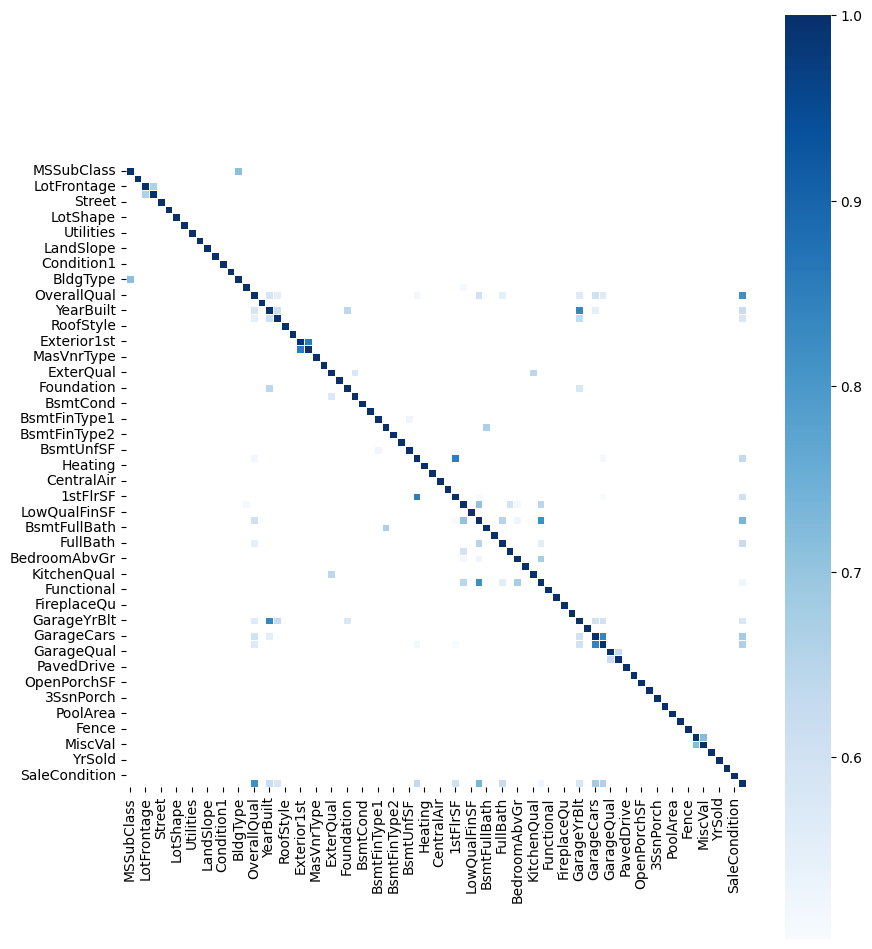

In [28]:
f, ax = plt.subplots(figsize=(10,12))
sns.heatmap(corrmat,mask=corrmat<0.50,linewidth=0.5,cmap="Blues", square=True)

There are highly correalted features, but I decided to not delete them, because I will use these features to create new features.

In [29]:
train_num_vars = train_data.select_dtypes(include=['int','float']).columns.tolist()
test_num_vars = train_data.select_dtypes(include=['int','float']).columns.tolist()

In [30]:
#Numeric features.
train_num = train_data[['LotFrontage', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                        'GrLivArea', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
                       'ScreenPorch', 'PoolArea']]

In [31]:
#Check data distribution - it is important to makes decision about next steps of data preprocessing
#Analyze selected numerical features (without PassengerId)
print("Visualization to explore numerical features")


def multiple_histograms(df, features, rows, cols):
    figure=plt.figure()
    figure, axes = plt.subplots(figsize=(20, 100))
    flattened_axes = figure.axes
    
    for i, feat in enumerate(features):
        ax=figure.add_subplot(rows,cols,i+1)
        df[feat].hist(bins=10,ax=ax)
        ax.set_title(feat)

    plt.show()

Visualization to explore numerical features


<Figure size 640x480 with 0 Axes>

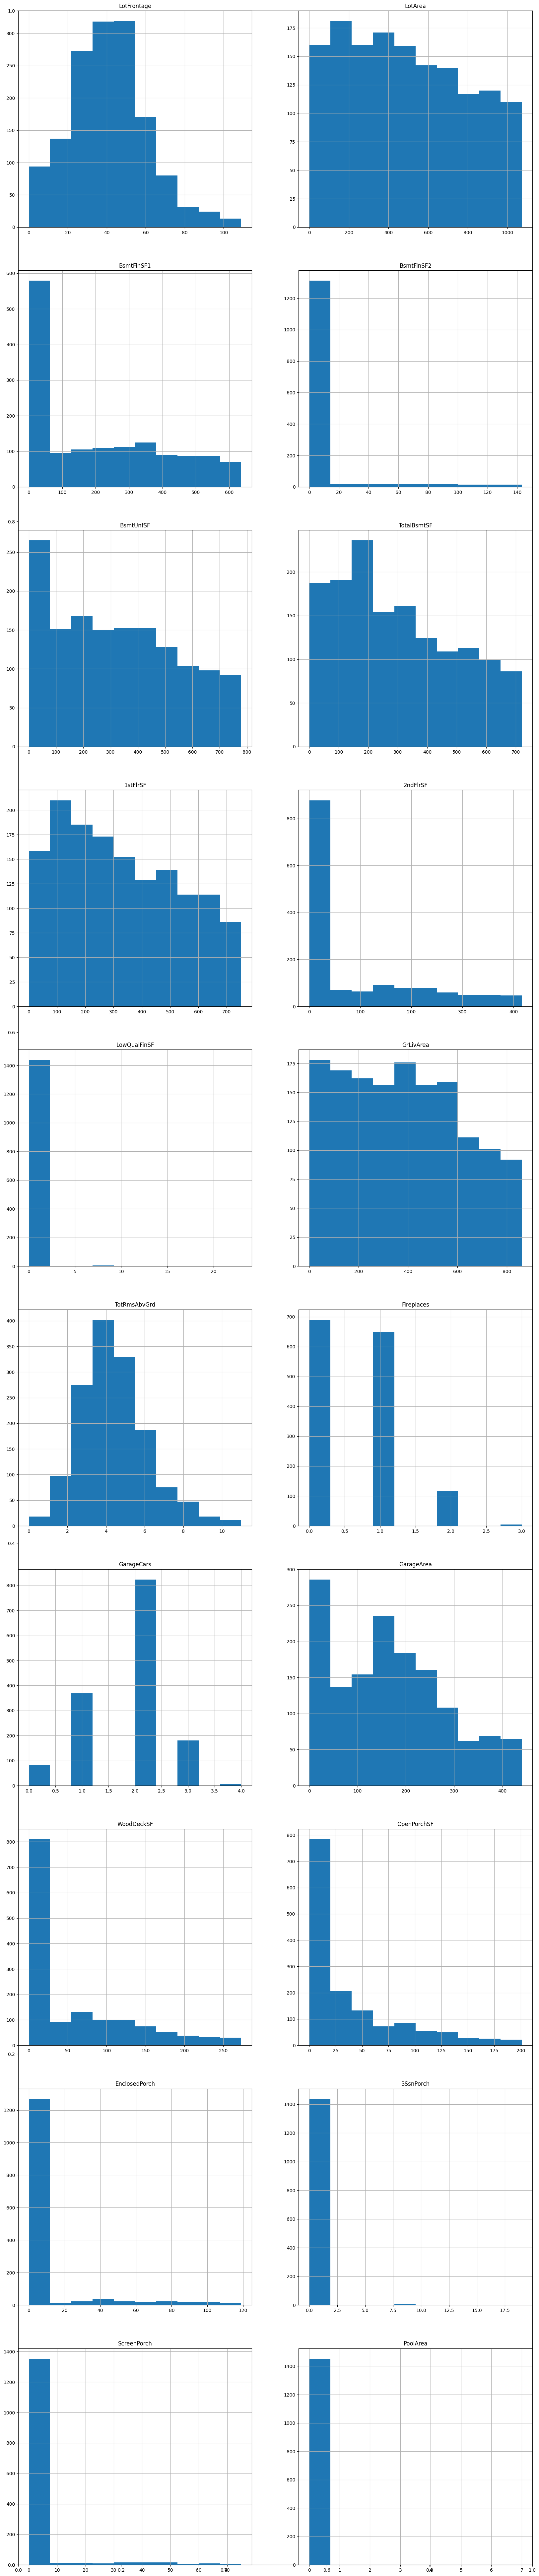

In [32]:
multiple_histograms(train_data,train_num,10, 2)

Many non normal distribution with high skewness and kurtosis observed - I will analyze it below this comment.

In [33]:
skewness_calc(train_data, train_num)

LotFrontage 0.3306824260542594
LotArea 0.18475209744382795
BsmtFinSF1 0.5301646804855993
BsmtFinSF2 3.494991116759612
BsmtUnfSF 0.24219901150281406
TotalBsmtSF 0.3786915805365577
1stFlrSF 0.2936032693779649
2ndFlrSF 1.181823379776643
LowQualFinSF 9.888844141371736
GrLivArea 0.19539554118736316
TotRmsAbvGrd 0.6577576140046131
Fireplaces 0.6495651830548841
GarageCars -0.3425489297486655
GarageArea 0.39148429011806474
WoodDeckSF 1.1842031097323205
OpenPorchSF 1.4628375360453223
EnclosedPorch 2.980545746180246
3SsnPorch 9.844182236371203
ScreenPorch 4.259541153360649
PoolArea 18.02092133426276


In [34]:
#Dealing with skewness. Create array with highly skewed data.
highly_skewed_vars = train_data[['BsmtFinSF2', '2ndFlrSF', 'LowQualFinSF', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
                                'PoolArea']]

In [35]:
def displot_kde_draw(df, features):
    for i, feat in enumerate(features):
        sns.displot(df[feat], kde=True)

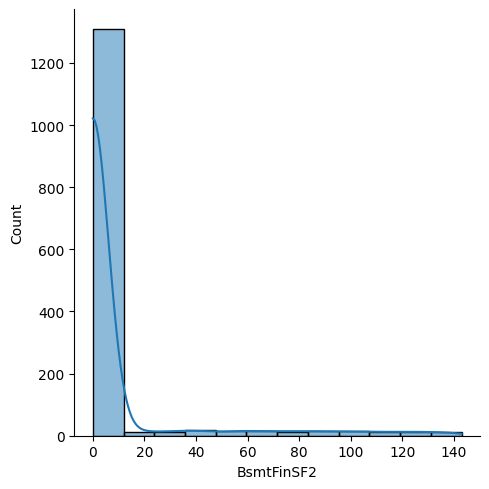

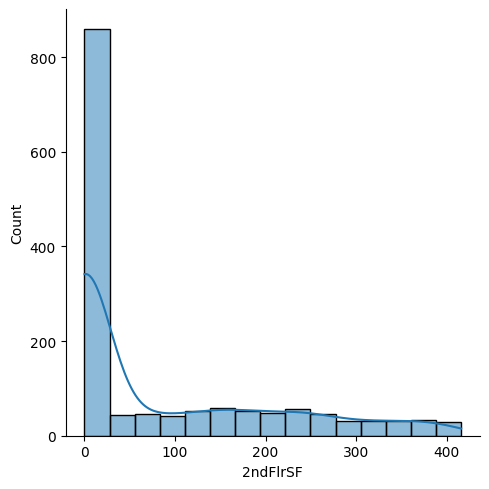

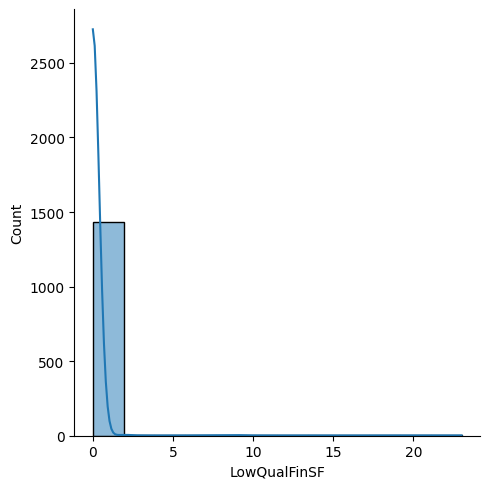

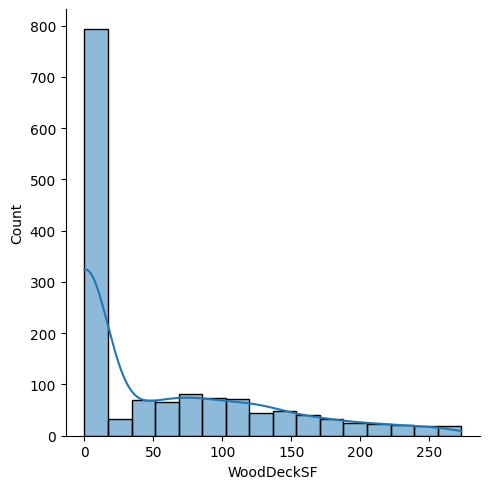

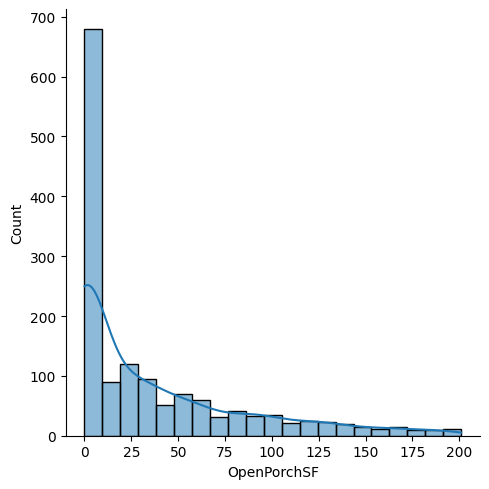

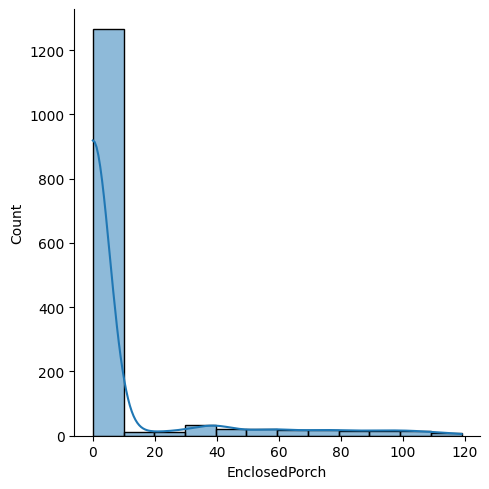

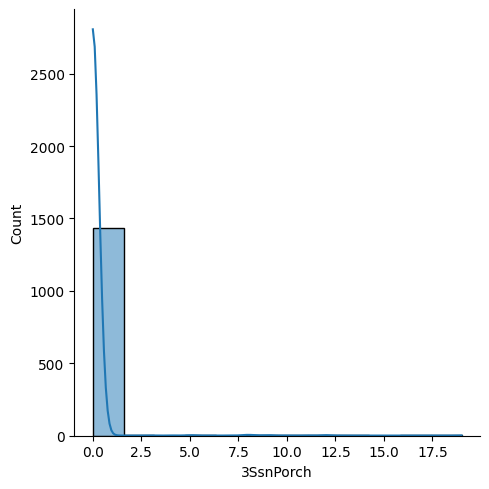

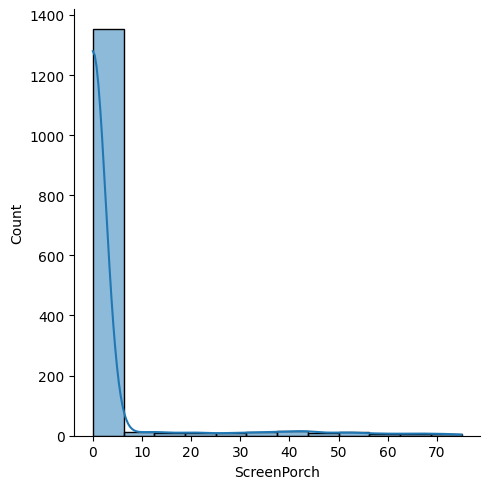

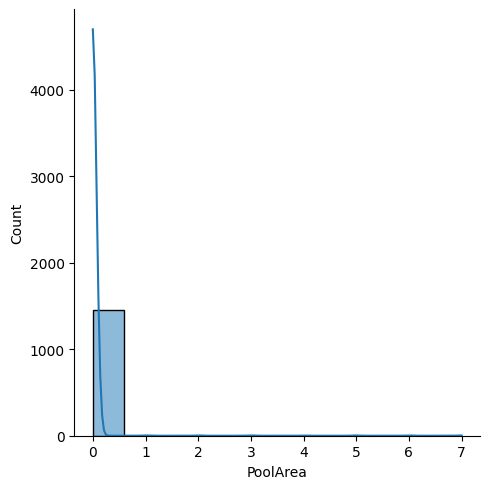

In [36]:
#Visualize skewness by displot.
displot_kde_draw(train_data, highly_skewed_vars)

In [37]:
#The log method will not work if 0 are present in data. I must inspect this case. Stackoverflow was very helpful in these case.
train_data['OpenPorchSF_ones'] = train_data['OpenPorchSF']+1
print('number of zeros in fare columns ->', train_data[train_data['OpenPorchSF']==0]['OpenPorchSF'].count())
print('number of zeros in fare_ones columns ->', train_data[train_data['OpenPorchSF_ones']==0]['OpenPorchSF_ones'].count())
print('number of nans in fare_ones columns ->', train_data['OpenPorchSF_ones'].isna().sum())
print('number of ones in fare_ones columns ->', train_data[train_data['OpenPorchSF_ones']==1]['OpenPorchSF_ones'].count())

number of zeros in fare columns -> 656
number of zeros in fare_ones columns -> 0
number of nans in fare_ones columns -> 0
number of ones in fare_ones columns -> 656


In [38]:
train_data['OpenPorchSF_ones'] = train_data['OpenPorchSF']+1
train_data['2ndFlrSF_ones'] = train_data['2ndFlrSF']+1
train_data['BsmtFinSF2_ones'] = train_data['BsmtFinSF2']+1
train_data['LowQualFinSF_ones'] = train_data['2ndFlrSF']+1
train_data['WoodDeckSF_ones'] = train_data['WoodDeckSF']+1
#train_data['OpenPorchSF_ones'] = train_data['OpenPorchSF']+1
train_data['EnclosedPorch_ones'] = train_data['EnclosedPorch']+1
train_data['3SsnPorch_ones'] = train_data['3SsnPorch']+1
train_data['ScreenPorch_ones'] = train_data['ScreenPorch']+1
train_data['PoolArea_ones'] = train_data['PoolArea']+1

In [39]:
train_data['OpenPorchSF_ones_log'] = np.log(train_data['OpenPorchSF_ones'])
train_data['2ndFlrSF_ones_log'] = np.log(train_data['2ndFlrSF_ones'])
train_data['BsmtFinSF2_ones_log'] = np.log(train_data['BsmtFinSF2_ones'])
train_data['LowQualFinSF_ones_log'] = np.log(train_data['LowQualFinSF_ones'])
train_data['WoodDeckSF_ones_log'] = np.log(train_data['WoodDeckSF_ones'])
train_data['EnclosedPorch_ones_log'] = np.log(train_data['EnclosedPorch_ones'])
train_data['3SsnPorch_ones_log'] = np.log(train_data['3SsnPorch_ones'])
train_data['ScreenPorch_ones_log'] = np.log(train_data['ScreenPorch_ones'])
train_data['PoolArea_ones_log'] = np.log(train_data['PoolArea_ones'])

In [40]:
train_num_var_log = train_data[['OpenPorchSF_ones_log', '2ndFlrSF_ones_log','BsmtFinSF2_ones_log', 'LowQualFinSF_ones_log', 'WoodDeckSF_ones_log', 
                        'EnclosedPorch_ones_log', '3SsnPorch_ones_log', 'ScreenPorch_ones_log', 'PoolArea_ones_log']]

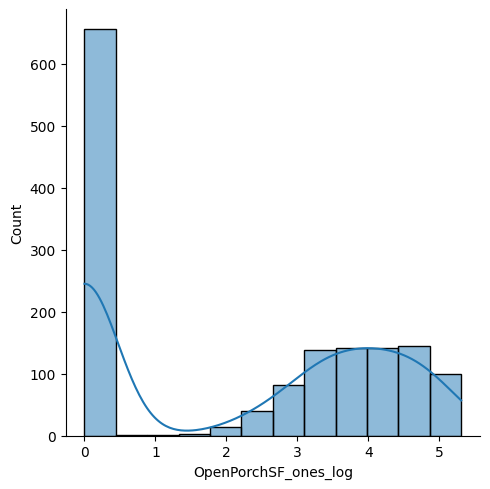

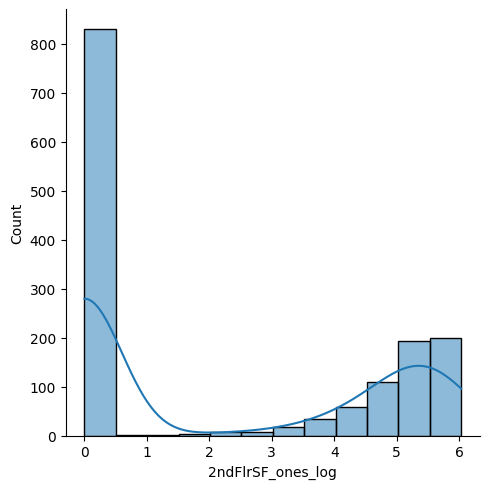

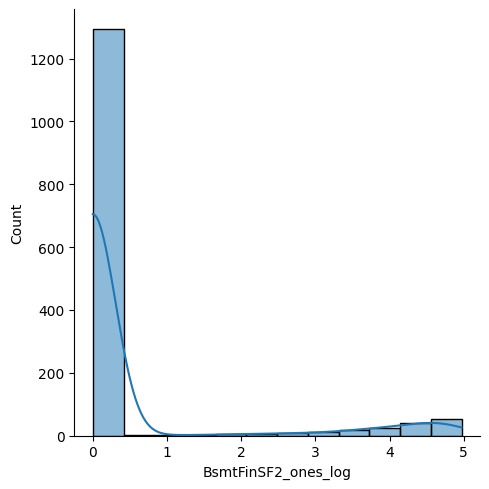

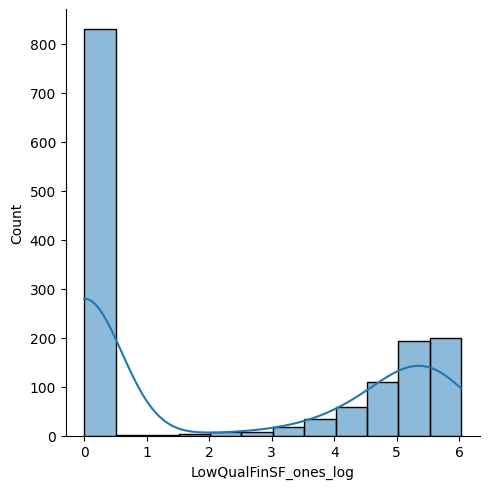

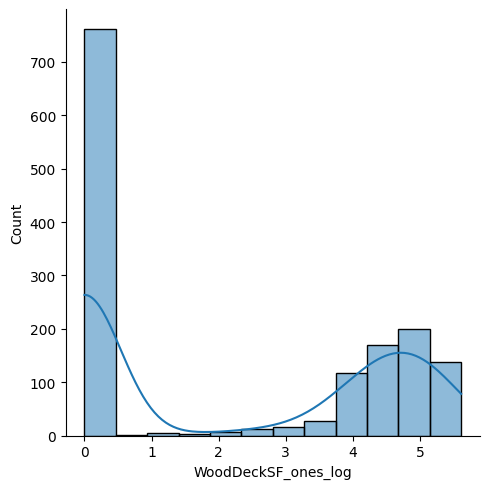

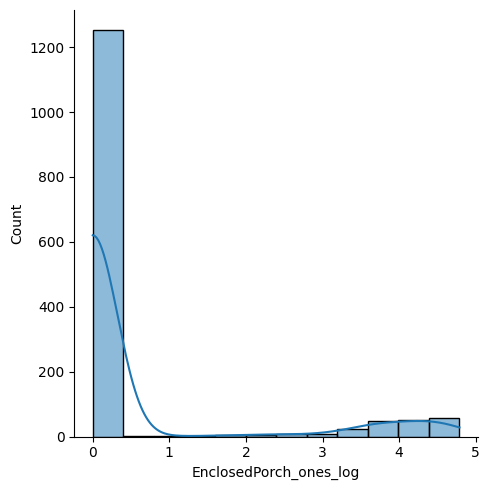

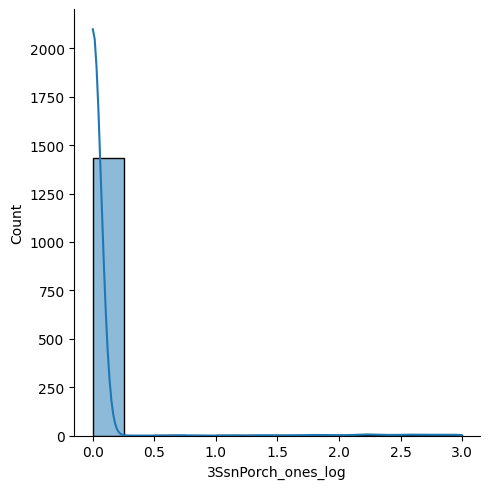

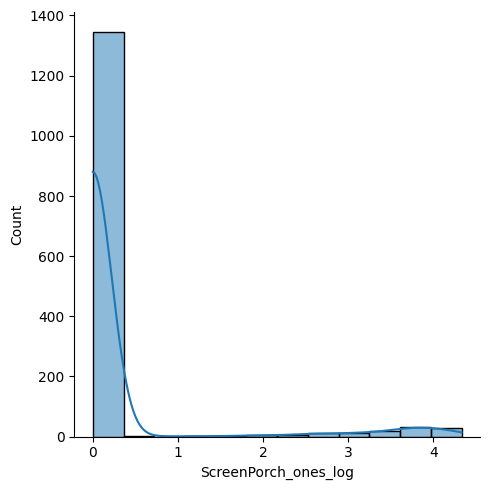

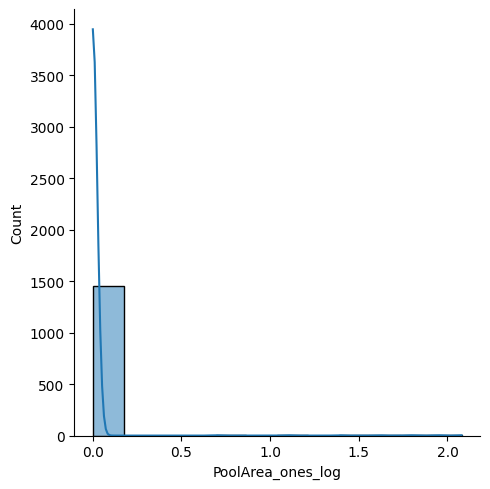

In [41]:
#Visualise log correction.
displot_kde_draw(train_data, train_num_var_log)

It's not a big difference. In some cases, you can see a slight improvement, so it was worth using this method I think.

In [42]:
kurtosis_calc(train_data, train_num)

LotFrontage 0.5498273285494282
LotArea -1.0924161828838994
BsmtFinSF1 -1.0775035010104717
BsmtFinSF2 11.504827400986558
BsmtUnfSF -1.0666527801102443
TotalBsmtSF -0.9648255113825641
1stFlrSF -1.0571571911278572
2ndFlrSF 0.07089664676652907
LowQualFinSF 103.3944679616878
GrLivArea -1.033013101570661
TotRmsAbvGrd 0.7742658438184367
Fireplaces -0.21723720752814657
GarageCars 0.22099776396532844
GarageArea -0.7071414646211469
WoodDeckSF 0.3625990013751492
OpenPorchSF 1.3767160376118404
EnclosedPorch 8.055704885848069
3SsnPorch 103.40028072233959
ScreenPorch 17.993394888451196
PoolArea 344.6937522218521


In [43]:
#Assign correct features with log changes.
train_data['OpenPorchSF'] = train_data['OpenPorchSF_ones_log']
train_data['2ndFlrSF'] = train_data['2ndFlrSF_ones_log']
train_data['BsmtFinSF2'] = train_data['BsmtFinSF2_ones_log']
train_data['LowQualFinSF'] = train_data['LowQualFinSF_ones_log']
train_data['WoodDeckSF'] = train_data['WoodDeckSF_ones_log']
train_data['EnclosedPorch'] = train_data['EnclosedPorch_ones_log']
train_data['3SsnPorch'] = train_data['3SsnPorch_ones_log']
train_data['ScreenPorch'] = train_data['ScreenPorch_ones_log']
train_data['PoolArea'] = train_data['PoolArea_ones_log']

In [44]:
kurtosis_calc(train_data, train_num)

LotFrontage 0.5498273285494282
LotArea -1.0924161828838994
BsmtFinSF1 -1.0775035010104717
BsmtFinSF2 5.102742840900779
BsmtUnfSF -1.0666527801102443
TotalBsmtSF -0.9648255113825641
1stFlrSF -1.0571571911278572
2ndFlrSF -1.7529342529758867
LowQualFinSF -1.7529342529758867
GrLivArea -1.033013101570661
TotRmsAbvGrd 0.7742658438184367
Fireplaces -0.21723720752814657
GarageCars 0.22099776396532844
GarageArea -0.7071414646211469
WoodDeckSF -1.838868425933008
OpenPorchSF -1.7510319946780268
EnclosedPorch 3.0046786433629262
3SsnPorch 67.92151892119702
ScreenPorch 9.477044849414664
PoolArea 259.63450705386896


In [45]:
high_kutosis_train = train_data[['BsmtFinSF2', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']]
target_Price = train_data['SalePrice']

In [46]:
def catplot_boxen_draw(df, features,target):
    for i, feat in enumerate(features):
        sns.catplot(x=feat, y=target, data=df, kind="boxen")

In [47]:
train_data = pd.DataFrame(train_data, columns = headers)

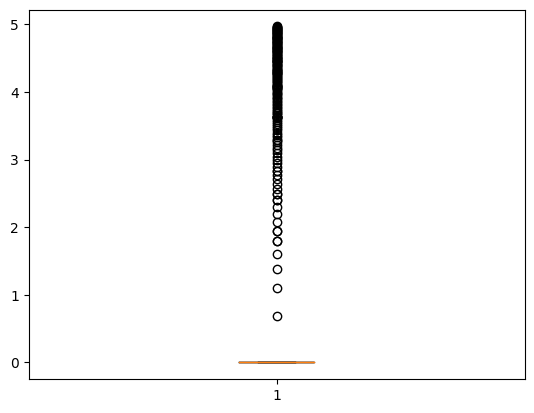

In [48]:
plt.boxplot(train_data['BsmtFinSF2'])
plt.show()

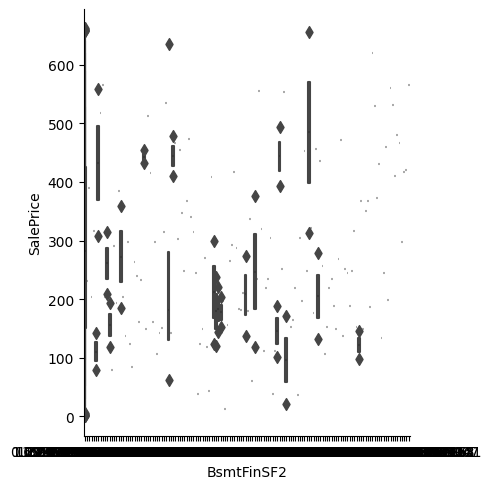

In [49]:
sns.catplot(x='BsmtFinSF2', y='SalePrice', data=train_data, kind="boxen")

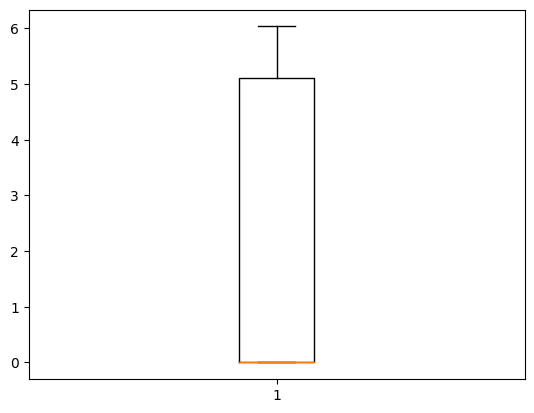

In [50]:
plt.boxplot(train_data['LowQualFinSF'])
plt.show()

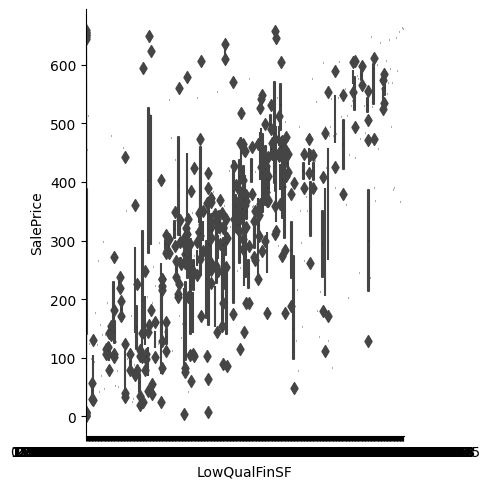

In [51]:
sns.catplot(x='LowQualFinSF', y='SalePrice', data=train_data, kind="boxen")

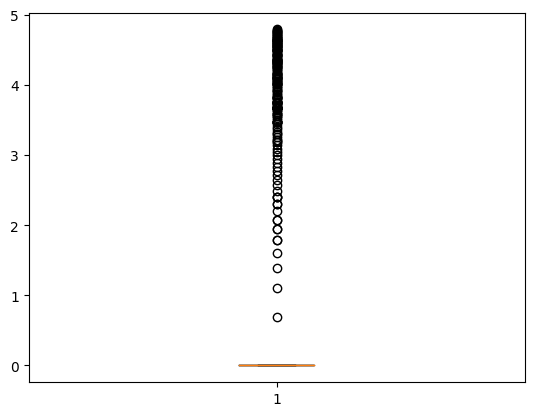

In [52]:
plt.boxplot(train_data['EnclosedPorch'])
plt.show()

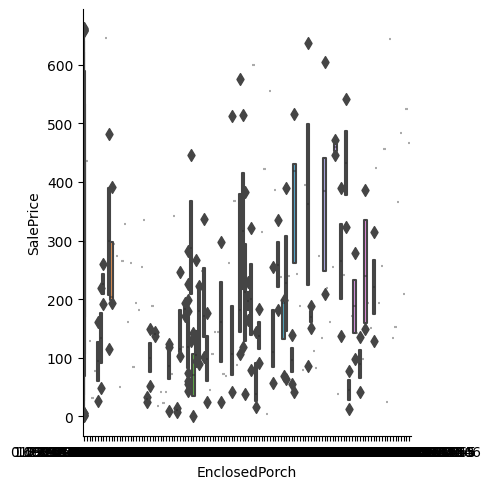

In [53]:
sns.catplot(x='EnclosedPorch', y='SalePrice', data=train_data, kind="boxen")

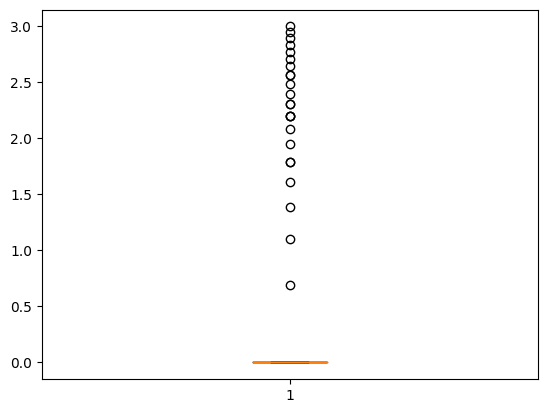

In [54]:
plt.boxplot(train_data['3SsnPorch'])
plt.show()

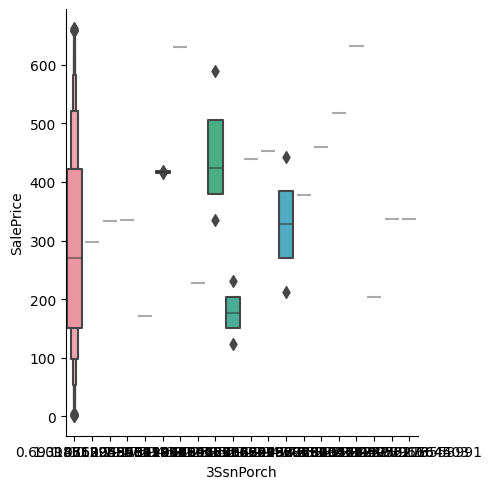

In [55]:
sns.catplot(x='3SsnPorch', y='SalePrice', data=train_data, kind="boxen")

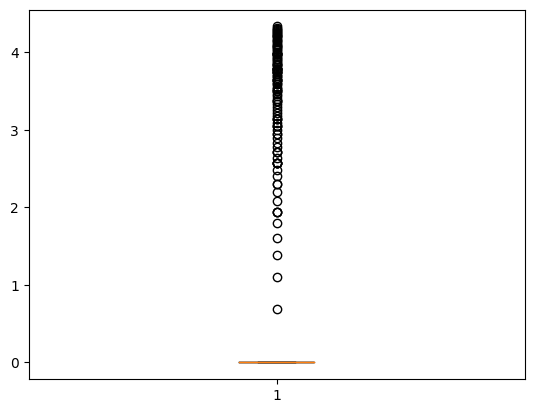

In [56]:
plt.boxplot(train_data['ScreenPorch'])
plt.show()

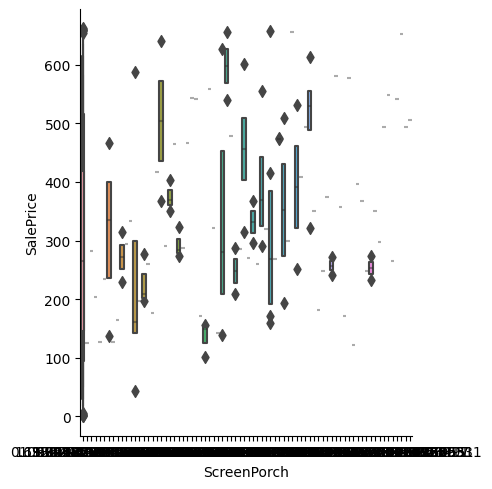

In [57]:
sns.catplot(x='ScreenPorch', y='SalePrice', data=train_data, kind="boxen")

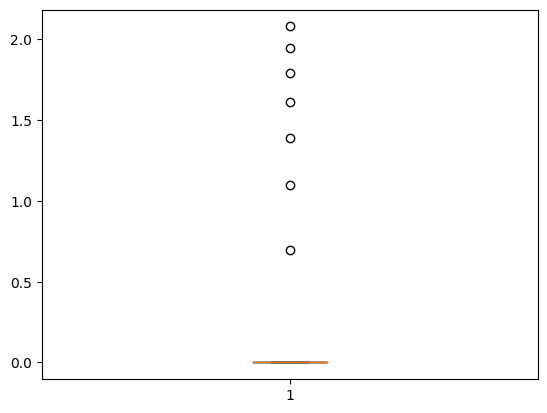

In [58]:
plt.boxplot(train_data['PoolArea'])
plt.show()

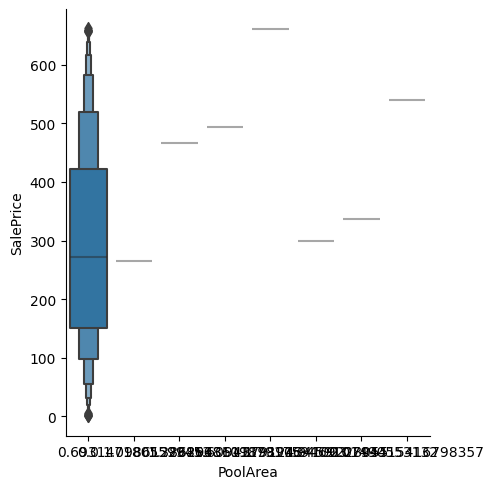

In [59]:
sns.catplot(x='PoolArea', y='SalePrice', data=train_data, kind="boxen")

1. BsmtFinSF2 has many zeros it is linked with BsmtFinType2 unfinished.So 0 is the most popular value and other values are recognized as
outliers.
2. EnclosedPorch, 3SsnPorch and ScreenPorch all these features have a lot of 0 value because lot of houses doesn't have porch at all.
3. PoolArea has a lot of 0 value because lot of houses doesn't have pool at all.
4. I decided that I want keep these 'outliers' because these are important data.


I will will added some new features to make observations more effective.
1. House age - It will be useful to calculate this value.
2. Overall house score.

In [60]:
train_data = pd.DataFrame(train_data, columns = headers)

In [61]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,5.0,3.0,36.0,327.0,1.0,1.0,3.0,3.0,0.0,4.0,...,0.0,3.0,4.0,1.0,0.0,1.0,2.0,8.0,4.0,412.0
1,0.0,3.0,51.0,498.0,1.0,1.0,3.0,3.0,0.0,2.0,...,0.0,3.0,4.0,1.0,0.0,4.0,1.0,8.0,4.0,339.0
2,5.0,3.0,39.0,702.0,1.0,1.0,0.0,3.0,0.0,4.0,...,0.0,3.0,4.0,1.0,0.0,8.0,2.0,8.0,4.0,442.0
3,6.0,3.0,31.0,489.0,1.0,1.0,0.0,3.0,0.0,0.0,...,0.0,3.0,4.0,1.0,0.0,1.0,0.0,8.0,0.0,194.0
4,5.0,3.0,55.0,925.0,1.0,1.0,0.0,3.0,0.0,2.0,...,0.0,3.0,4.0,1.0,0.0,11.0,2.0,8.0,4.0,494.0


In [62]:
train_data = pd.DataFrame(train_data, columns = headers)

Data splitting

In [63]:
#Useful data splitting - split train_data without new features
X = train_data.drop("SalePrice", axis=1) 
y = train_data["SalePrice"].reset_index(drop=True)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=0)

Standard Scaler.

In [65]:
#Data preprocessing

scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[-0.99654868, -0.03970035,  1.59201103, ..., -0.62498664,
         0.30059109, -1.59920532],
       [-0.02959577, -0.03970035,  0.46438763, ..., -1.37131572,
         0.30059109,  0.21299072],
       [-0.02959577, -0.03970035, -0.42529688, ...,  0.86767151,
         0.30059109,  0.21299072],
       ...,
       [-0.99654868, -0.03970035,  1.08509776, ...,  0.12134244,
         0.30059109,  0.21299072],
       [-0.99654868, -0.03970035, -0.15632249, ...,  0.86767151,
         0.30059109,  0.21299072],
       [-0.99654868, -0.03970035,  1.55063035, ...,  1.61400059,
        -1.08185711,  1.11908874]])

In [66]:
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

discrete_features = X.dtypes == int

Label encoding for categorical features and (very important) check discrete features before Mutual Info Regression

Mutual info regression.

In [67]:
#I get this method from Kaggle

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores

OverallQual     0.573643
Neighborhood    0.536409
GrLivArea       0.455693
GarageArea      0.385287
GarageCars      0.381160
                  ...   
MoSold          0.000000
Utilities       0.000000
PoolQC          0.000000
PoolArea        0.000000
3SsnPorch       0.000000
Name: MI Scores, Length: 79, dtype: float64

<Axes: >

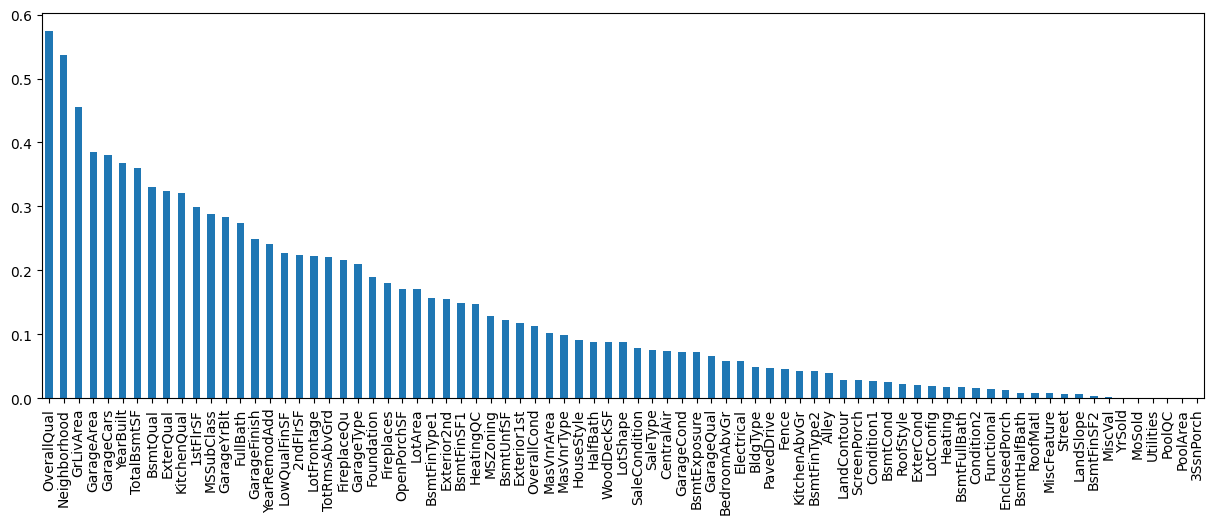

In [68]:
mi_scores.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [69]:
#https://guhanesvar.medium.com/feature-selection-based-on-mutual-information-gain-for-classification-and-regression-d0f86ea5262a
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(X_train.fillna(0), y_train)
selected_top_columns.get_support()

array([ True, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
        True, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False,  True,
        True, False, False,  True, False, False, False,  True, False,
       False, False, False, False,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [70]:
X_train.columns[selected_top_columns.get_support()]

Index(['MSSubClass', 'Neighborhood', 'OverallQual', 'YearBuilt', 'ExterQual',
       'BsmtQual', 'TotalBsmtSF', '1stFlrSF', 'LowQualFinSF', 'GrLivArea',
       'FullBath', 'KitchenQual', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea'],
      dtype='object')

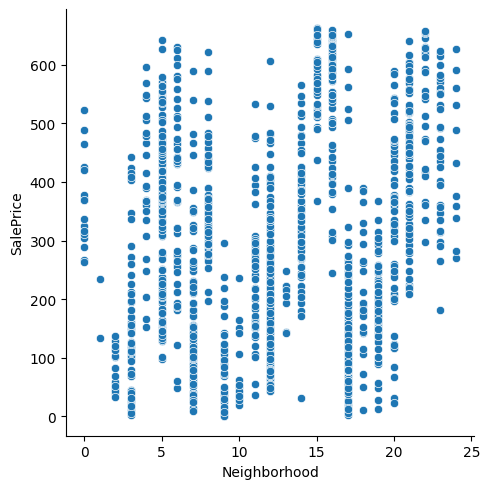

In [71]:
#Visualise selected features.
sns.relplot(x="Neighborhood", y="SalePrice", data=train_data);

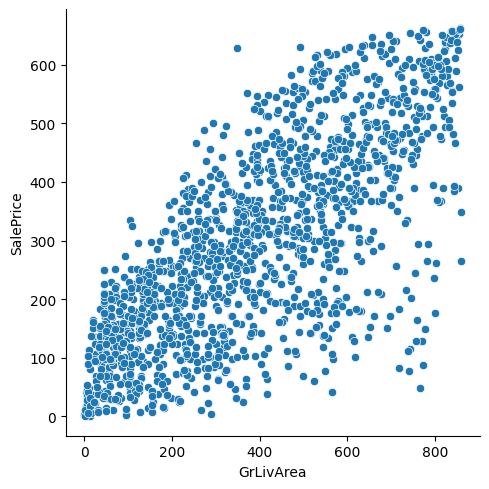

In [72]:
sns.relplot(x="GrLivArea", y="SalePrice", data=train_data);

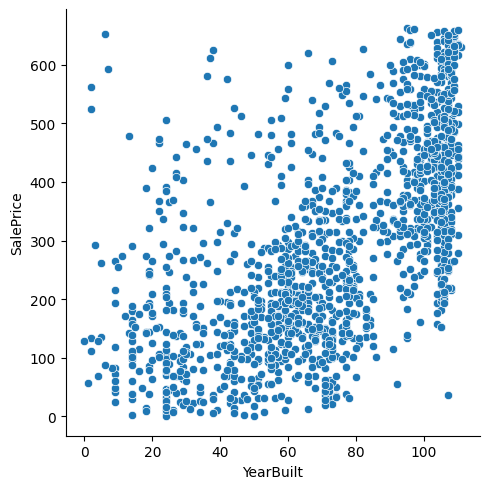

In [73]:
sns.relplot(x="YearBuilt", y="SalePrice", data=train_data);

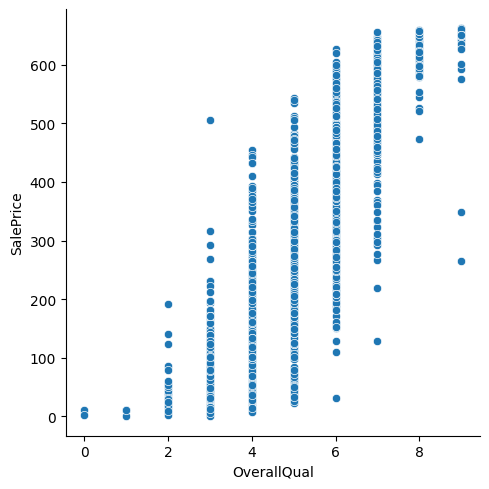

In [74]:
sns.relplot(x="OverallQual", y="SalePrice", data=train_data);

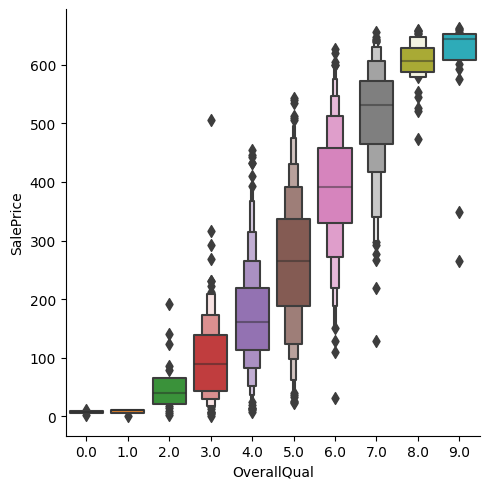

In [75]:
sns.catplot(x="OverallQual", y="SalePrice", data=train_data, kind="boxen")

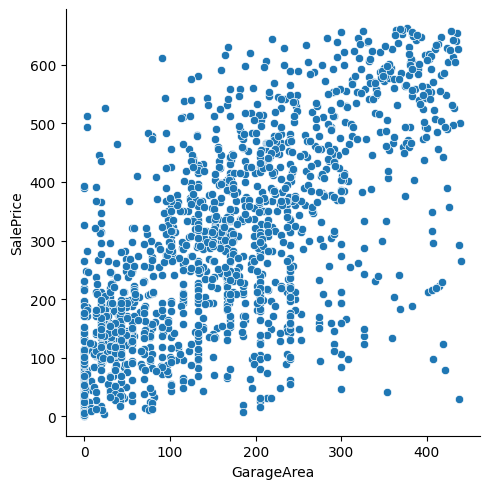

In [76]:
sns.relplot(x="GarageArea", y="SalePrice", data=train_data)

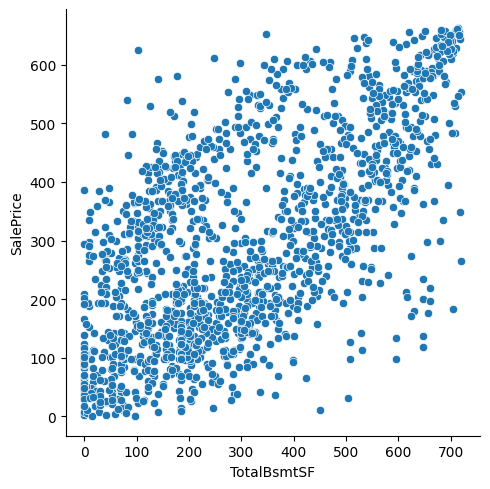

In [77]:
sns.relplot(x="TotalBsmtSF", y="SalePrice", data=train_data)

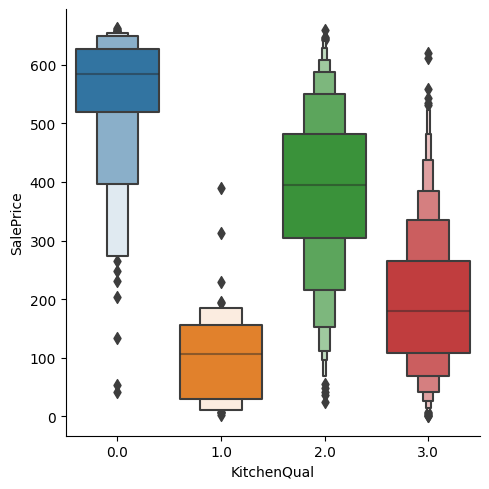

In [78]:
sns.catplot(x="KitchenQual", y="SalePrice", data=train_data, kind="boxen")

In [79]:
#Create new features. Also I assign it to new dataframe to divide dataframes.
new_df = train_data
new_test = test_data

In [80]:
new_test.shape

(1459, 79)

In [81]:
new_test = pd.DataFrame(new_test, columns = testheaders)

In [82]:
#New feature - Age of house.
new_df['Age'] = pd.to_numeric(train_data['YearBuilt'] - pd.to_numeric(train_data['YrSold']))
new_test['Age'] = pd.to_numeric(test_data['YearBuilt'] - pd.to_numeric(test_data['YrSold']))

In [83]:
#New feature - Overall quality of house.
new_df['Score_Quality_House'] = train_data['OverallQual'] + train_data['OverallCond']
new_test['Score_Quality_House'] = test_data['OverallQual'] + test_data['OverallCond']

<Axes: >

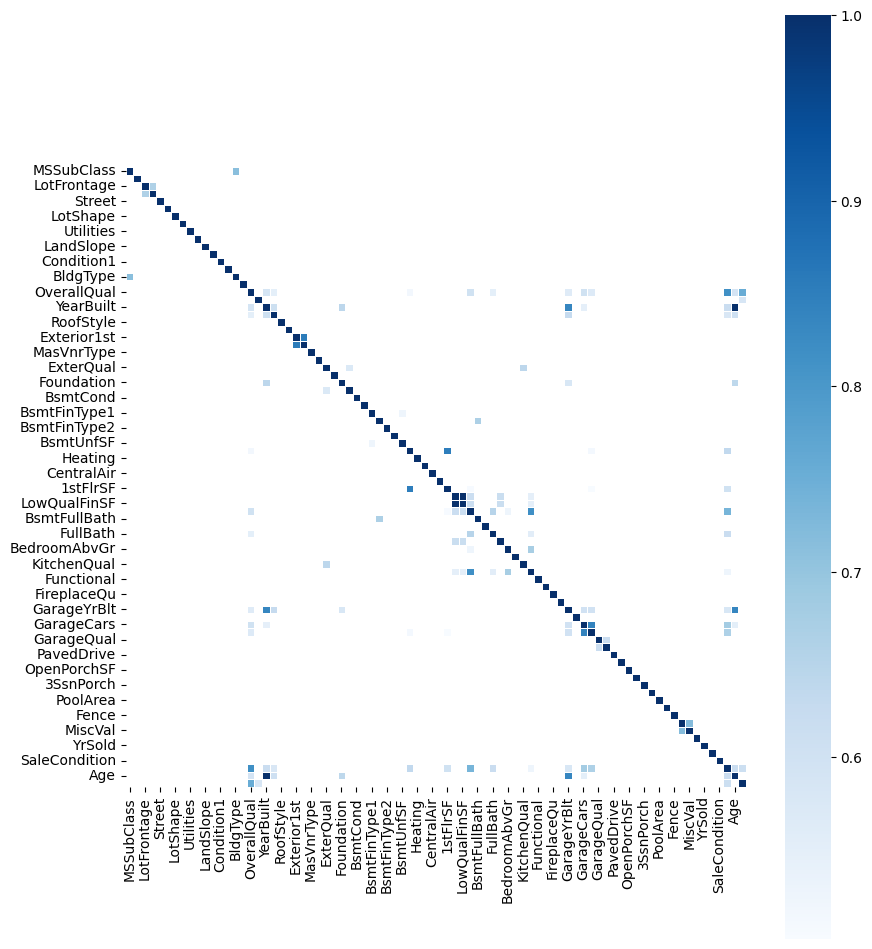

In [84]:
#Correlation with all features (with new features also) on train set.
corrmat_new=new_df.corr()
corrmat_new['SalePrice'].sort_values(ascending=False).head(20)
f, ax = plt.subplots(figsize=(10,12))
sns.heatmap(corrmat_new,mask=corrmat_new<0.50,linewidth=0.5,cmap="Blues", square=True)

In [85]:
#Split new df with new features added.
X1 = new_df.drop("SalePrice", axis=1) 
y1 = new_df["SalePrice"].reset_index(drop=True)

In [86]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, train_size=0.7, test_size=0.3, random_state=0)

In [87]:
for colname in X1.select_dtypes("object"):
    X1[colname], _ = X1[colname].factorize()

discrete_features1 = X1.dtypes == int

In [88]:
mi_scores1 = make_mi_scores(X1, y1, discrete_features1)
mi_scores1

OverallQual     0.555382
Neighborhood    0.533874
GrLivArea       0.456381
GarageArea      0.387076
GarageCars      0.366893
                  ...   
ExterCond       0.000000
Street          0.000000
MiscVal         0.000000
MoSold          0.000000
BsmtFinSF2      0.000000
Name: MI Scores, Length: 81, dtype: float64

<Axes: >

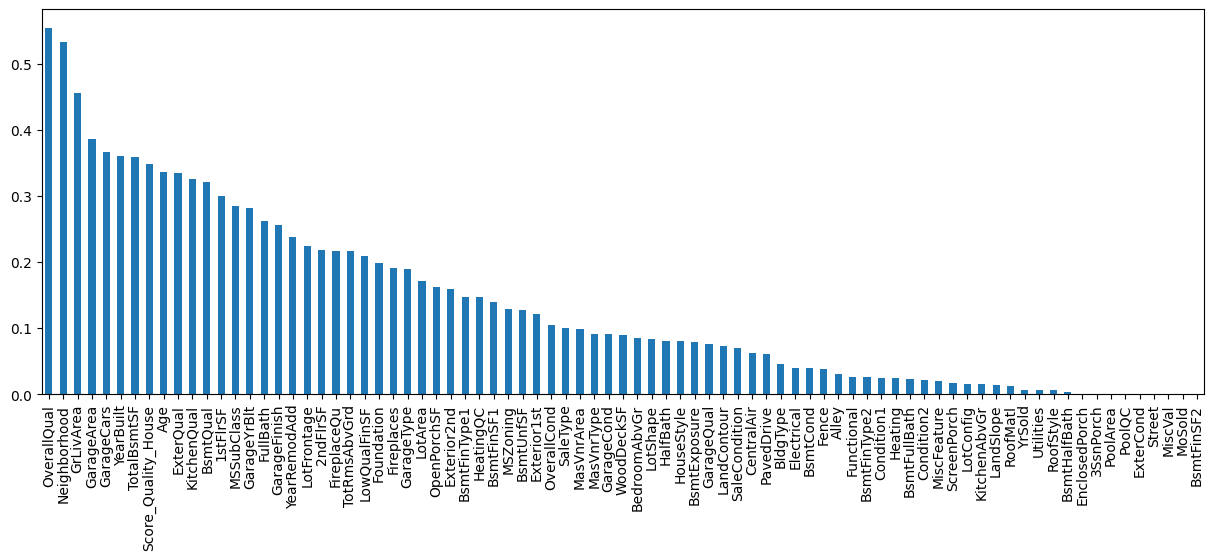

In [89]:
mi_scores1.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [90]:
selected_top_columns1 = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns1.fit(X_train1.fillna(0), y_train1)
selected_top_columns1.get_support()

array([ True, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
        True, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
        True, False, False,  True, False, False, False,  True, False,
       False, False, False, False,  True, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True])

In [91]:
X_train1.columns[selected_top_columns1.get_support()]

Index(['MSSubClass', 'Neighborhood', 'OverallQual', 'YearBuilt', 'ExterQual',
       'BsmtQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath',
       'KitchenQual', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'Age',
       'Score_Quality_House'],
      dtype='object')

In [92]:
new_df.shape

(1460, 82)

Baseline and Linear Regression models.

In [93]:
#Build simple baseline model to comparing.
#https://lifewithdata.com/2022/03/22/how-to-create-a-baseline-regression-model-in-scikit-learn/

dummy_reg = DummyRegressor(strategy='mean')

dummy_reg.fit(X_train, y_train)

y_pred = dummy_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Dummy RMSE:", rmse)


Dummy RMSE: 170.36382511713003


In [94]:
dummy_reg1 = DummyRegressor(strategy='median')

dummy_reg1.fit(X_train, y_train)

y_pred1 = dummy_reg1.predict(X_test)


mse1 = mean_squared_error(y_test, y_pred1)
rmse1 = np.sqrt(mse1)
print("Dummy Constant RMSE:", rmse1)

Dummy Constant RMSE: 171.3880413873547


In [95]:
dummy_reg2 = DummyRegressor(strategy='mean')

dummy_reg2.fit(X_train1, y_train1)

y_pred2 = dummy_reg2.predict(X_test1)

mse2 = mean_squared_error(y_test1, y_pred2)
rmse2 = np.sqrt(mse2)
print("Dummy RMSE:", rmse2)


Dummy RMSE: 170.36382511713003


In [96]:
dummy_reg3 = DummyRegressor(strategy='median')

dummy_reg3.fit(X_train1, y_train1)

y_pred3 = dummy_reg.predict(X_test1)

mse3 = mean_squared_error(y_test1, y_pred3)
rmse3 = np.sqrt(mse3)
print("Dummy RMSE:", rmse3)


Dummy RMSE: 170.36382511713003


In [97]:
#Trying Linear Regression for few configurations.

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)
print("Linear Regression RMSE:", lin_rmse)
print("R-squared (R²):", r_squared)

Linear Regression RMSE: 58.465125865001795
R-squared (R²): 0.8822210320886932


In [98]:
reg1 = LinearRegression()
reg1.fit(X_train1, y_train1)
y_pred1 = reg1.predict(X_test1)


mse1 = mean_squared_error(y_test1, y_pred1)
lin_rmse1 = np.sqrt(mse1)
r_squared1 = r2_score(y_test1, y_pred1)
print("Linear Regression RMSE:", lin_rmse1)
print("R-squared (R²):", r_squared1)

Linear Regression RMSE: 58.465125865002555
R-squared (R²): 0.8822210320886902


The best score in Linear Regression method refers to original data.

XGBRegressor

In [99]:
#XGBRegressor for dataframe without new features.


model_XGB = XGBRegressor()
clf_XGB = model_XGB.fit(X_train, y_train)
XGB_score = clf_XGB.score(X_test, y_test)
XGB_score


0.9006205391686287

In [100]:
#XGBRegressor for dataframe with added features.


model_XGB1 = XGBRegressor()
clf_XGB1 = model_XGB1.fit(X_train1, y_train1)
XGB_score1 = clf_XGB1.score(X_test1, y_test1)
XGB_score1

0.9003811350871517

XGBRegressor cross validation score.

In [101]:
#XGBRegressor cross validation 1st model.

cv_cross = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores_cross = cross_val_score(model_XGB, X, y, scoring='neg_mean_absolute_error', cv=cv_cross, n_jobs=-1)
# Modify scores to be positive
scores_cross = absolute(scores_cross)
print('Mean MAE: %.3f (%.3f)' % (scores_cross.mean(), scores_cross.std()) )

Mean MAE: 38.901 (3.617)


In [102]:
#XGBRegressor cross validation 2nd model.

cv_cross1 = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores_cross1 = cross_val_score(model_XGB1, X1, y1, scoring='neg_mean_absolute_error', cv=cv_cross1, n_jobs=-1)

scores_cross1 = absolute(scores_cross1)
print('Mean MAE: %.3f (%.3f)' % (scores_cross1.mean(), scores_cross1.std()) )

Mean MAE: 39.172 (3.588)


In [103]:
#XGBRegressor best hyperparams for X and Y(1st model)

model_boost_XGB = XGBRegressor()
parameters_boost_XGB = { 'learning_rate' : [0.03, 0.1], 'reg_lambda': [2, 5], 'reg_alpha': [1, 5]}

model_XGB = XGBRegressor() 
model_boost_XGB.fit(X_train, y_train) 

grid_boost_XGB = GridSearchCV(estimator=model_boost_XGB, param_grid = parameters_boost_XGB, cv = 2, n_jobs=-1) 
grid_boost_XGB.fit(X_train, y_train)

XGB_Boost_best_params = grid_boost_XGB.best_params_
XGB_Boost_best_params

{'learning_rate': 0.1, 'reg_alpha': 5, 'reg_lambda': 2}

In [104]:
#Trying new hyperparameters.


model_XGB_tuned = XGBRegressor(reg_alpha = 5, reg_lambda = 2, learning_rate = 0.1 )
clf_XGB_tuned = model_XGB_tuned.fit(X_train, y_train)
XGB_score_tuned = clf_XGB_tuned.score(X_test, y_test)
XGB_score_tuned

0.9048336055282182

SVR linear model - commented because it is very long process.

#SVR kernel linear
svr = SVR(kernel='linear') 
  
# train the model on the data 
svr.fit(X_train1, y_train1) 

# make predictions on the data 
y_pred_svr = svr.predict(X_train1) 

y_test_pred = svr.predict(X_test1)
r2_score = round(metrics.r2_score(y_test1, y_test_pred),2)
rmse = round(np.sqrt(metrics.mean_squared_error(y_test1, y_test_pred)),2)
print(f'r2: {r2_score}')
print(f'rmse: {rmse}')
#r2: 0.89
#rmse: 55.72


Gradient Boosting Regressor - Ensemble method 

In [105]:
#https://towardsdatascience.com/create-a-model-to-predict-house-prices-using-python-d34fe8fad88f
#Let's try Gradient Boosting Regressor

clfGradBoostReg = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split=2,                                                    learning_rate = 0.1)

In [106]:
clfGradBoostReg.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [107]:
clfGradBoostReg.score(X_test, y_test)

0.9216810593599424

In [108]:
#Testing better hyperparameters.
print("Gradient Boosting Regressor the best hyperparameters by Grid Search.")
params = {'criterion':['friedman_mse','squared_error'],
          'min_samples_split': [2, 10],
          'n_estimators': [400, 800]}

grid_object = GridSearchCV(GradientBoostingRegressor(), params, cv=3, n_jobs=-1)

grid_object.fit(X_train,y_train)


# show best parameter for classifier
Grad_Boost_tree_params = grid_object.best_params_
Grad_Boost_tree_params

Gradient Boosting Regressor the best hyperparameters by Grid Search.


{'criterion': 'friedman_mse', 'min_samples_split': 2, 'n_estimators': 400}

GridSearchCV for hyperparameters choice - This doesn't always work for me and I often try my own configurations. I could check more parameters, but unfortunately, when there are more variables, everything freezes, so I only choose a few. This method is free, maybe next project I will try RandomizedSearchCV.

In [109]:
#Inspect GridSearchCV result
clfGradBoostReg1 = ensemble.GradientBoostingRegressor(criterion = 'squared_error', n_estimators = 800, max_depth = 3, min_samples_split=2,
                                                    learning_rate = 0.1)

In [110]:
clfGradBoostReg1.fit(X_train, y_train)

GradientBoostingRegressor(criterion='squared_error', n_estimators=800)

In [111]:
clfGradBoostReg1.score(X_test, y_test)

0.9196559159397261

In [112]:
#Trying my own configurations
clfGradBoostRegdata1 = ensemble.GradientBoostingRegressor(criterion = 'squared_error', n_estimators = 400, max_depth = 3, min_samples_split=2,
                                                    learning_rate = 0.1)

In [113]:
clfGradBoostRegdata1.fit(X_train1, y_train1)

GradientBoostingRegressor(criterion='squared_error', n_estimators=400)

In [114]:
clfGradBoostRegdata1.score(X_test1, y_test1)

0.9244815851863621

In [115]:
train_data = pd.DataFrame(train_data, columns = headers)

Decision Tree Regressor.

In [116]:
#Trying Decision Tree Regressor

regressor = DecisionTreeRegressor(criterion="poisson", random_state=0)
regressor.fit(X_train, y_train)

#from sklearn.model_selection import cross_val_score


#score = cross_val_score(regressor, X_test, y_test)
score = regressor.score(X_test, y_test)
score 

0.7325036517199357

In [117]:
#Trying Decision Tree Regressor


regressordata1 = DecisionTreeRegressor(criterion="poisson", random_state=0)
regressordata1.fit(X_train1, y_train1)

scoredata1 = regressordata1.score(X_test1, y_test1)
scoredata1

0.7773784784477826

In [118]:
#Trying Decision Tree Regressor

regressor_squared = DecisionTreeRegressor(criterion="squared_error", random_state=0)
regressor_squared.fit(X_train, y_train)

#from sklearn.model_selection import cross_val_score


#score = cross_val_score(regressor, X_test, y_test)
score_squared = regressor_squared.score(X_test, y_test)
score_squared

0.7465850443513891

Ada Boost Regressor - ensemble method.

In [119]:
#AdaBoostRegressor for X, y
regr = AdaBoostRegressor(random_state=0, n_estimators=100)
regr.fit(X_train, y_train)


regr.score(X_test, y_test)

0.8598263256215066

In [120]:
#AdaBoostRegressor for X1, y1
regr1 = AdaBoostRegressor(random_state=0, n_estimators=100)
regr1.fit(X_train1, y_train1)
#AdaBoostRegressor(n_estimators=100, random_state=0)

regr1.score(X_test1, y_test1)

0.8640780076571566

In [121]:
#AdaBoost best params
from sklearn.model_selection import GridSearchCV

model_boost_Ada = AdaBoostRegressor() 
parameters_boost_Ada = { 'learning_rate' : [0.03, 0.1], 'n_estimators': [50, 200]}

model_Ada = AdaBoostRegressor() 
model_boost_Ada.fit(X_train, y_train) 

grid_boost_Ada = GridSearchCV(estimator=model_boost_Ada, param_grid = parameters_boost_Ada, cv = 2, n_jobs=-1) 
grid_boost_Ada.fit(X_train, y_train)

Ada_Boost_best_params = grid_boost_Ada.best_params_
Ada_Boost_best_params

{'learning_rate': 0.1, 'n_estimators': 200}

In [122]:

regr_tuned = AdaBoostRegressor(n_estimators=200, random_state=0, learning_rate = 0.1)
regr_tuned.fit(X_train, y_train)

regr_tuned.score(X_test, y_test)

0.8549640430965366

Random Forest Regressor.

In [123]:
#RandomForestRegressor
#https://www.geeksforgeeks.org/random-forest-regression-in-python/

regressor_rand = RandomForestRegressor(n_estimators=10, random_state=0)
 
# Fit the regressor with x and y data
regressor_rand.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [124]:
# Evaluating the model

 
# Making predictions on the same data or new data
predictions_rand = regressor_rand.predict(X_test)
 
# Evaluating the model
mse_forest = mean_squared_error(y_test, predictions_rand)
print(f'Mean Squared Error: {mse_forest}')
 
r2 = r2_score(y_test, predictions_rand)
r2

Mean Squared Error: 3267.792808219178


0.8874025697413982

In [125]:
#RandomForestRegressor

regressordata1 = RandomForestRegressor(n_estimators=10, random_state=0)
 
# Fit the regressor with x and y data
regressordata1.fit(X_train1, y_train1)

RandomForestRegressor(n_estimators=10, random_state=0)

In [126]:
# Evaluating the model

# Making predictions on the same data or new data
predictionsdata1 = regressordata1.predict(X_test1)
 
# Evaluating the model
mse_forestdata1 = mean_squared_error(y_test1, predictionsdata1)
print(f'Mean Squared Error: {mse_forestdata1}')
 
r2 = r2_score(y_test1, predictionsdata1)
r2

Mean Squared Error: 3498.1561643835616


0.8794650034842548

I'm not going to search better hyperparams because in this case this method gives weak scores.

Hist gradient Boosting Regressor.

In [127]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

model01 = HistGradientBoostingRegressor()
model01.fit(X_train, y_train)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_val_score(model01, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
rmse_values = np.sqrt(-cv_results)
average_rmse = np.sqrt(-cv_results.mean())
print("Root Mean Squared Error for each fold:", rmse_values)
print("Average Root Mean Squared Error across all folds:", average_rmse)

/opt/conda/lib/python3.10/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Root Mean Squared Error for each fold: [57.43768591 47.62875942 61.85861016 57.30574402 50.68483002]
Average Root Mean Squared Error across all folds: 55.221326368200224


In [128]:
model00 = HistGradientBoostingRegressor()
model00.fit(X_train1, y_train1)
kf00 = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results00 = cross_val_score(model00, X_train1, y_train1, cv=kf00, scoring='neg_mean_squared_error')
rmse_values00 = np.sqrt(-cv_results00)
average_rmse00 = np.sqrt(-cv_results00.mean())
print("Root Mean Squared Error for each fold:", rmse_values00)
print("Average Root Mean Squared Error across all folds:", average_rmse00)

Root Mean Squared Error for each fold: [54.03660744 45.23464461 61.01267354 57.0228193  49.28530945]
Average Root Mean Squared Error across all folds: 53.608428438323166


Cat Boost Regressor.

In [129]:
#Trying CatBoostRegressor
model_1 = catboost.CatBoostRegressor(
    logging_level='Silent',
    iterations=2000,
    l2_leaf_reg=1
)
model_1.fit(X_train, y_train)
r2_score(model_1.predict(X_test), y_test)

0.9205099396983372

In [130]:
model11 = catboost.CatBoostRegressor(
    logging_level='Silent',
    iterations=2000,
    l2_leaf_reg=1
)
model11.fit(X_train1, y_train1)
r2_score(model11.predict(X_test1), y_test1)

0.9203625600462333

from sklearn.model_selection import GridSearchCV

model_boost = CatBoostRegressor() parameters_boost = { 'learning_rate' : [0.03, 0.1], 'l2_leaf_reg': [0.2, 3]}

model_1 = catboost.CatBoostRegressor() model_1.fit(X_train, y_train) #r2_score(model_1.predict(X_test), y_test)

grid_boost = GridSearchCV(estimator=model_1, param_grid = parameters_boost, cv = 2, n_jobs=-1) grid_boost.fit(X_train, y_train)

Cat_Boost_best_params = grid_boost.best_params_ Cat_Boost_best_params

Result od Grid search CV
{'l2_leaf_reg': 3, 'learning_rate': 0.03}
I commented my GridSearchCV of CatBoostRegressor parameters because it sometimes crashes my program.

In [131]:
#Inspect GridSearchCV results.
model_2 = catboost.CatBoostRegressor(
    logging_level='Silent',
    iterations=2000,
    l2_leaf_reg=3,
    learning_rate= 0.03)
model_2.fit(X_train, y_train)
r2_score(model_2.predict(X_test), y_test)

0.9218167194421177

In [132]:
model_3 = catboost.CatBoostRegressor(
    logging_level='Silent',
    iterations=2000,
    l2_leaf_reg=2,
    learning_rate= 0.03,
    depth = 5)
model_3.fit(X_train, y_train)
r2_score(model_3.predict(X_test), y_test)

0.9251977876992727

Best results so far now.

In [133]:
model_4 = catboost.CatBoostRegressor(
    logging_level='Silent',
    iterations=2000,
    l2_leaf_reg=2,
    learning_rate= 0.03,
    depth = 5,
    leaf_estimation_method= 'Gradient'

)
model_4.fit(X_train, y_train)
r2_score(model_4.predict(X_test), y_test)

0.9251823908742448

In [134]:
modelj1 = catboost.CatBoostRegressor(
    logging_level='Silent',
    iterations=2000,
    l2_leaf_reg=1
)
modelj1.fit(X_train, y_train)
r2_score(modelj1.predict(X_test), y_test)

0.9205099396983372

Voting Regressor.

In [135]:
#VotingRegressor
#https://www.geeksforgeeks.org/voting-regressor/

cat_reg = catboost.CatBoostRegressor(logging_level='Silent',
    iterations=2000,
    l2_leaf_reg=2,
    learning_rate= 0.03,
    depth = 5)
svr_reg = SVR(kernel='sigmoid')  # You can choose different kernels if needed
xgb_reg = XGBRegressor(reg_alpha = 5, reg_lambda = 2, learning_rate = 0.1)
grad_reg = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split=2,learning_rate = 0.1)

In [136]:
# Create a Voting Regressor with the individual models
voting_reg = VotingRegressor(estimators=[('cat', cat_reg),  ('svr', svr_reg), ('xgb', xgb_reg), ('grad', grad_reg)],
                             n_jobs=-1)
 
# Fit the Voting Regressor on the training data
voting_reg.fit(X_train, y_train)

VotingRegressor(estimators=[('cat',
                             <catboost.core.CatBoostRegressor object at 0x7b5ac89d3e20>),
                            ('svr', SVR(kernel='sigmoid')),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=No...
                                          learning_rate=0.1, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...)),
                            ('grad',
                             GradientBoostingRegressor(max_depth=5,
                                                       n_estimators=400))],
                n_jobs=-1)

In [137]:
# Make predictions on the testing data
pred = voting_reg.predict(X_test)
 
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, pred)
 
# Calculate R-squared (R2) score
r2 = r2_score(y_test, pred)
 
# Print the evaluation metrics
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R2) Score: {r2:.2f}')

Mean Absolute Error (MAE): 47.80
R-squared (R2) Score: 0.87


In [138]:
train_data = pd.DataFrame(train_data, columns = headers)

In [139]:
train_data.shape

(1460, 80)

Chosen model analysis and last parameters modifications.

In [140]:
from catboost import Pool
#I added od_pval and od_wait trying to reduce risk of overfitting. I don't know it is correct syntax.
model_3tuned = catboost.CatBoostRegressor(
    logging_level='Silent',
    iterations=2000,
    l2_leaf_reg=2,
    learning_rate= 0.03,
    depth = 5,
    od_pval = 0,
    od_type="Iter", 
    od_wait=10)
model_3tuned.fit(X_train, y_train)
r2_score(model_3tuned.predict(X_test), y_test)

0.9251977876992727

In [141]:
#I added od_pval and od_wait trying to reduce risk of overfitting. 
#Moreover I try a lot of hyperparams configurations and I choose the best for my model.
model_4tuned = catboost.CatBoostRegressor(
    logging_level='Silent',
    iterations=2000,
    l2_leaf_reg=2,
    learning_rate= 0.03,
    depth = 5,
    random_seed = 42,
    eval_metric='RMSE',
    od_pval = 0,
    od_type='Iter', 
    od_wait=10)
model_4tuned.fit(X_train, y_train)
final_model_score = r2_score(model_4tuned.predict(X_test), y_test)

In [142]:
final_model_score

0.9265307380220232

In [143]:
#Final predictions
test_pred = model_4tuned.predict(test_data)
submission = pd.DataFrame(test_ID, columns = ['Id'])
submission['SalePrice'] = test_pred 
submission.head()

,Id,SalePrice
0,1461,211.433109
1,1462,314.270726
2,1463,383.289002
3,1464,395.122676
4,1465,379.658973


In [144]:
# Saving the results

submission.to_csv("submission.csv", index = False, header = True)